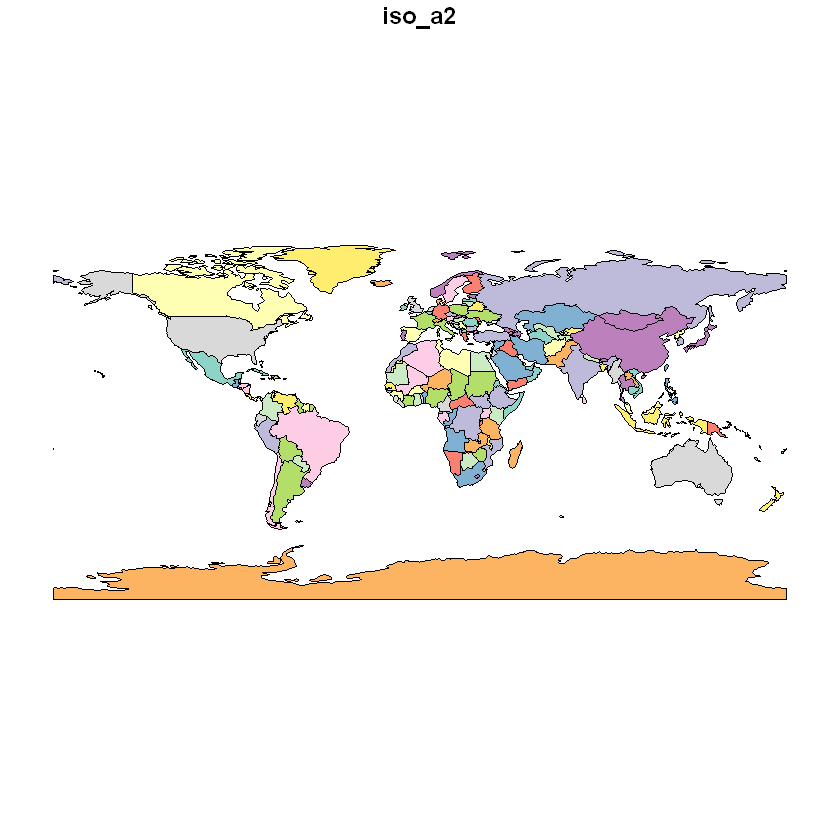

Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal component of 3D system."],
        AREA["World."],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


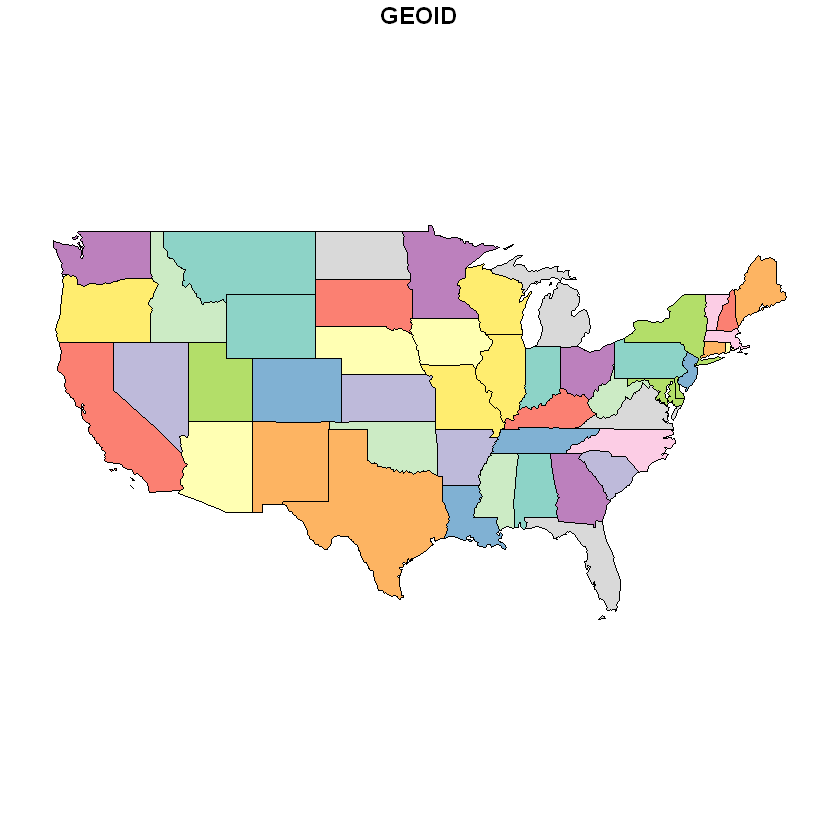

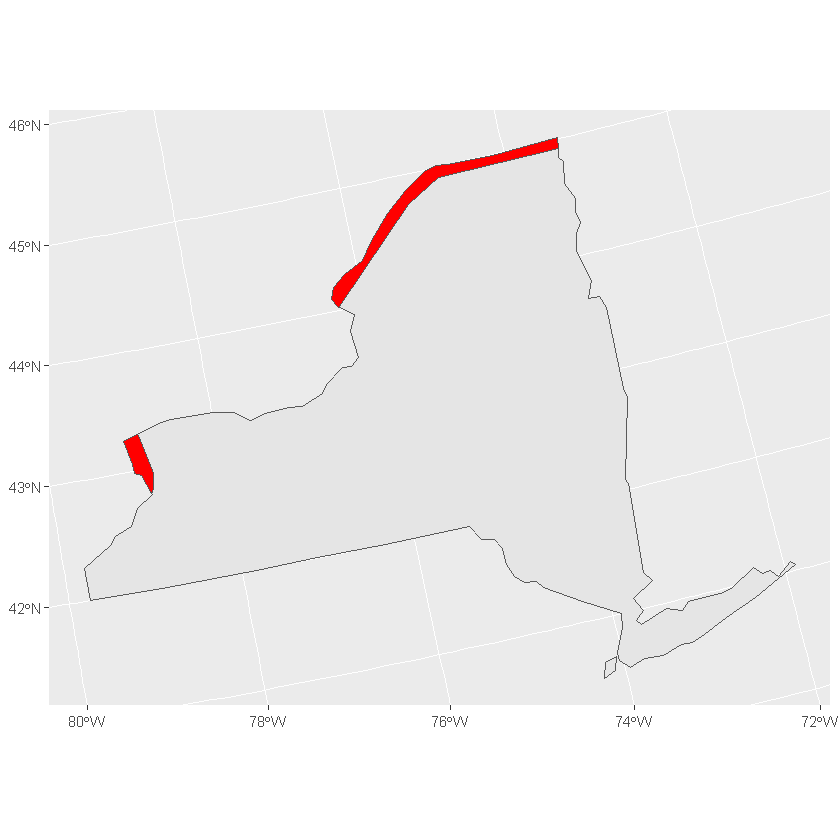

In [4]:
library(dplyr)
library(tidyverse)
library(spData)
library(sf)
library(units)
library(tmap)
## -------------------------------------------------------------------------
#load 'world' data from spData package
data(world)  
# load 'states' boundaries from spData package
data(us_states)
## -------------------------------------------------------------------------
#quick view 
plot(world[1]) 
plot(us_states[1])
## -------------------------------------------------------------------------
# check world crs 
st_crs(world)
## -------------------------------------------------------------------------
albers = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

canada_buffer =  world %>% 
  st_transform(crs = albers) %>% 
  filter(name_long == "Canada") %>% 
  st_buffer(dist = 10000)

ny =  us_states %>% 
  st_transform(crs = albers) %>% 
  filter(NAME == "New York")

intersection = st_intersection(canada_buffer, ny)


## -------------------------------------------------------------------------
# method 1
ggplot() +
  geom_sf(data = ny) +
  geom_sf(data = intersection, fill = "red")